## 1. 导入依赖包

In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

## 2. 加载数据并预处理

In [2]:
data = pd.read_csv('../../data/Income.csv')
X = torch.from_numpy(data.Education.values.reshape(-1, 1).astype(np.float32))
Y = torch.from_numpy(data.Income.values.reshape(-1, 1).astype(np.float32))

## 3. 初始化权重和偏置

In [3]:
w = torch.randn(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

## 4. 定义学习率

In [4]:
learning_rate = 0.001

## 5. 反向传播更新参数

In [5]:
for epoch in range(1000):
    for x, y in zip(X, Y):
        y_pred = torch.matmul(x, w) + b
        loss = (y - y_pred).pow(2).mean()
        if not w.grad is None:
            w.grad.data.zero_()
        if not b.grad is None:
            b.grad.data.zero_()
        loss.backward()
        with torch.no_grad():
            w.data -= w.grad.data * learning_rate
            b.data -= b.grad.data * learning_rate

## 6.绘制原始数据和预测数据

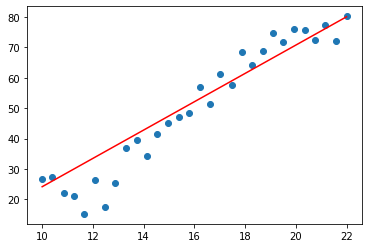

In [6]:
plt.scatter(data.Education, data.Income)
plt.plot(X.numpy(), (X*w + b).data.numpy(), c='r')